# A. Practicing NumPy

**A.1 Matrix Multiplication (Resource Allocation)**

In [1]:
import numpy as np

Resources_Matrix = np.array([
    [10, 20],
    [15, 25],
    [30, 40]
])

Allocation_Factors = np.array([
    [0.5, 1.0],
    [1.5, 0.5]
])

Result = np.dot(Resources_Matrix, Allocation_Factors)

print("Results 3x2 matrix:")
print(Result)

Results 3x2 matrix:
[[35.  20. ]
 [45.  27.5]
 [75.  50. ]]


**A.2 Element-wise Operations (Production Tracking)**

In [44]:
# 3 factories x 7 days
Shift_A_Production = np.array([
    [10, 12, 14, 13, 12, 15, 15],
    [8,  13,  10, 11, 12, 16, 19],
    [20, 21, 19, 18, 19, 15, 14]
])

Shift_B_Production = np.array([
    [5,  6,  7,  8,  7,  6,  5],
    [4,  7,  6,  3,  6,  5,  4],
    [10, 11,  8,  12,  7, 14, 11]
])

Total_Production = Shift_A_Production + Shift_B_Production

print("Total Production:")
print(Total_Production)

Total Production:
[[15 18 21 21 19 21 20]
 [12 20 16 14 18 21 23]
 [30 32 27 30 26 29 25]]


**A.3 Activation Function (Sigmoid in Sales Forecasting)**

In [3]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

values = np.array([-2, -1, 0, 1, 2])

sigmoid_output = sigmoid(values)

print("Input:")
print(values)
print("Sigmoid output:")
print(sigmoid_output)

Input:
[-2 -1  0  1  2]
Sigmoid output:
[0.11920292 0.26894142 0.5        0.73105858 0.88079708]


**A.4 Gradient Calculation (Learning Adjustment)**

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_gradient(x):
    s = sigmoid(x)
    return s * (1 - s)

values = np.array([-2, -1, 0, 1, 2])

grad_output = sigmoid_gradient(values)

print("Input:")
print(values)
print("Sigmoid gradient:")
print(grad_output)

Input:
[-2 -1  0  1  2]
Sigmoid gradient:
[0.10499359 0.19661193 0.25       0.19661193 0.10499359]


# C. NumPy


W1 (Hidden Layer Weights):
 [[-1.14091117 -1.43878782 -0.50217801]
 [-0.16881896 -0.39232639 -1.76430556]
 [ 1.46821     1.75892699 -2.32416456]]

b1 (Hidden Layer Bias):
 [[0.16074086 0.26497648 2.05162856]]

W2 (Output Layer Weights):
 [[-1.85218769]
 [-2.30941092]
 [-3.59186478]]

b2 (Output Layer Bias):
 [[2.57295536]]
Target: 18 | Predicted: 18.41
Target: 20 | Predicted: 19.95
Target: 22 | Predicted: 22.10
Target: 25 | Predicted: 24.99
Target: 30 | Predicted: 29.15


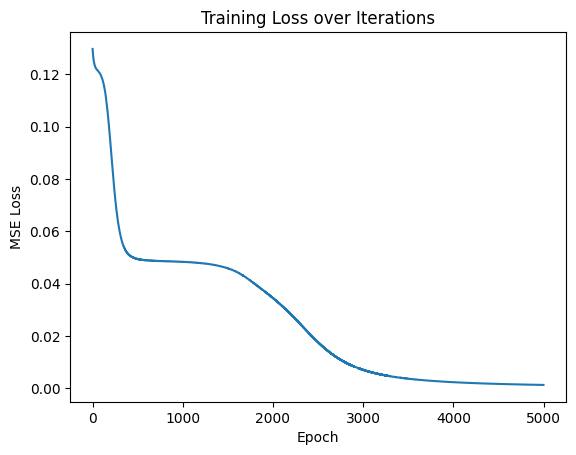

In [36]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
])

y = np.array([[18], [20], [22], [25], [30]])

X_min, X_max = X.min(axis=0), X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

y_min, y_max = y.min(), y.max()
y_scaled = (y - y_min) / (y_max - y_min)

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

np.random.seed(42)
W1 = np.random.randn(3, 3) * 0.1
b1 = np.zeros((1, 3))
W2 = np.random.randn(3, 1) * 0.1
b2 = np.zeros((1, 1))

lr = 0.1
epochs = 5000
loss_history = []

for i in range(epochs):
    # Forward
    z1 = np.dot(X_scaled, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # MSE
    loss = np.mean((a2 - y_scaled)**2)
    loss_history.append(loss)

    # Backpropagation
    dz2 = (a2 - y_scaled) * sigmoid_deriv(z2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_deriv(z1)
    dW1 = np.dot(X_scaled.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Gradient Descent
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

# Results
final_preds = a2 * (y_max - y_min) + y_min

print("\nW1 (Hidden Layer Weights):\n", W1)
print("\nb1 (Hidden Layer Bias):\n", b1)
print("\nW2 (Output Layer Weights):\n", W2)
print("\nb2 (Output Layer Bias):\n", b2)

for i in range(len(y)):
    print(f"Target: {y[i][0]} | Predicted: {final_preds[i][0]:.2f}")

plt.plot(loss_history)
plt.title("Training Loss over Iterations")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()